In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import geobr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy as sa
import sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('main.ipynb'))))

import database as db
from images import get_list_of_images_invalid, select_images
from models import County, DataTrustedIdentifier

In [3]:
engine, session=db.connect()
engine.echo=False

2023-04-13 15:21:59,266 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-04-13 15:21:59,267 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-13 15:21:59,269 INFO sqlalchemy.engine.Engine select current_schema()
2023-04-13 15:21:59,270 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-13 15:21:59,271 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-04-13 15:21:59,272 INFO sqlalchemy.engine.Engine [raw sql] {}


In [4]:
geobr.list_geobr()
states = geobr.read_state(year=2020)
regions = geobr.read_region(year=2020)

minimum_image=5
color='rgb'
image_size='256'
list_regions=['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']
list_images_invalid=get_list_of_images_invalid()
list_images_invalid=list_images_invalid['barcode']

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

/home/none/miniconda3/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/none/miniconda3/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/none/miniconda3/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/none/miniconda3/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecation

## Data of states

In [7]:
query=session.query(County.uf).distinct().all()
list_uf=[s.uf for s in query]
states.sort_values(by=['abbrev_state'], inplace=True)
list_count_states_total=[]
list_level_states_total=[]

In [8]:
for uf in sorted(list_uf):
    query = session.query(County).filter(County.uf.__eq__(uf)).distinct().all()
    state_unaccented_lower, uf_unaccented_lower, county_unaccented_lower = db.get_state_uf_county(query)

    list_level = []
    list_path_images_final = []
    list_seq_final = []
    list_count_samples = []

    level=DataTrustedIdentifier.specific_epithet_trusted
    condition = sa.and_(DataTrustedIdentifier.country_trusted.__eq__('Brasil'),
                        level.is_not(None),
                        sa.or_(sa.and_(uf_unaccented_lower,
                                       state_unaccented_lower,
                                       county_unaccented_lower),
                               sa.and_(uf_unaccented_lower,
                                       county_unaccented_lower),
                               sa.and_(state_unaccented_lower,
                                       county_unaccented_lower),
                               uf_unaccented_lower,
                               state_unaccented_lower)
                        )

    query = db.get_records_group_by_level(condition, level, minimum_image, session)
    print('uf: %s color: %s image_size: %s minimum_image: %d' % (uf, color.upper(), image_size, minimum_image))
    select_images(color, image_size, list_count_samples, list_level, list_images_invalid, list_path_images_final, list_seq_final, minimum_image, session, query)

    total = np.sum([c for c in list_count_samples])
    print('total of images: %d total of levels: %d' % (total, len(list_level)))
    list_level_states_total.append(len(list_level))
    list_count_states_total.append(total/len(list_level))

states['level']=list_level_states_total
states['total']=list_count_states_total

uf: AC color: RGB image_size: 256 minimum_image: 5
total of images: 373 total of levels: 34
uf: AL color: RGB image_size: 256 minimum_image: 5
total of images: 0 total of levels: 0


/tmp/ipykernel_83068/3933453331.py:31: RuntimeWarning: invalid value encountered in double_scalars
  list_count_states_total.append(total/len(list_level))


uf: AM color: RGB image_size: 256 minimum_image: 5
total of images: 1028 total of levels: 61
uf: AP color: RGB image_size: 256 minimum_image: 5
total of images: 61 total of levels: 8
uf: BA color: RGB image_size: 256 minimum_image: 5
total of images: 896 total of levels: 44
uf: CE color: RGB image_size: 256 minimum_image: 5
total of images: 8 total of levels: 1
uf: DF color: RGB image_size: 256 minimum_image: 5
total of images: 373 total of levels: 22
uf: ES color: RGB image_size: 256 minimum_image: 5
total of images: 247 total of levels: 25
uf: GO color: RGB image_size: 256 minimum_image: 5
total of images: 368 total of levels: 17
uf: MA color: RGB image_size: 256 minimum_image: 5
total of images: 28 total of levels: 2
uf: MG color: RGB image_size: 256 minimum_image: 5
total of images: 817 total of levels: 46
uf: MS color: RGB image_size: 256 minimum_image: 5
total of images: 111 total of levels: 11
uf: MT color: RGB image_size: 256 minimum_image: 5
total of images: 159 total of level

/home/none/miniconda3/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/none/miniconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


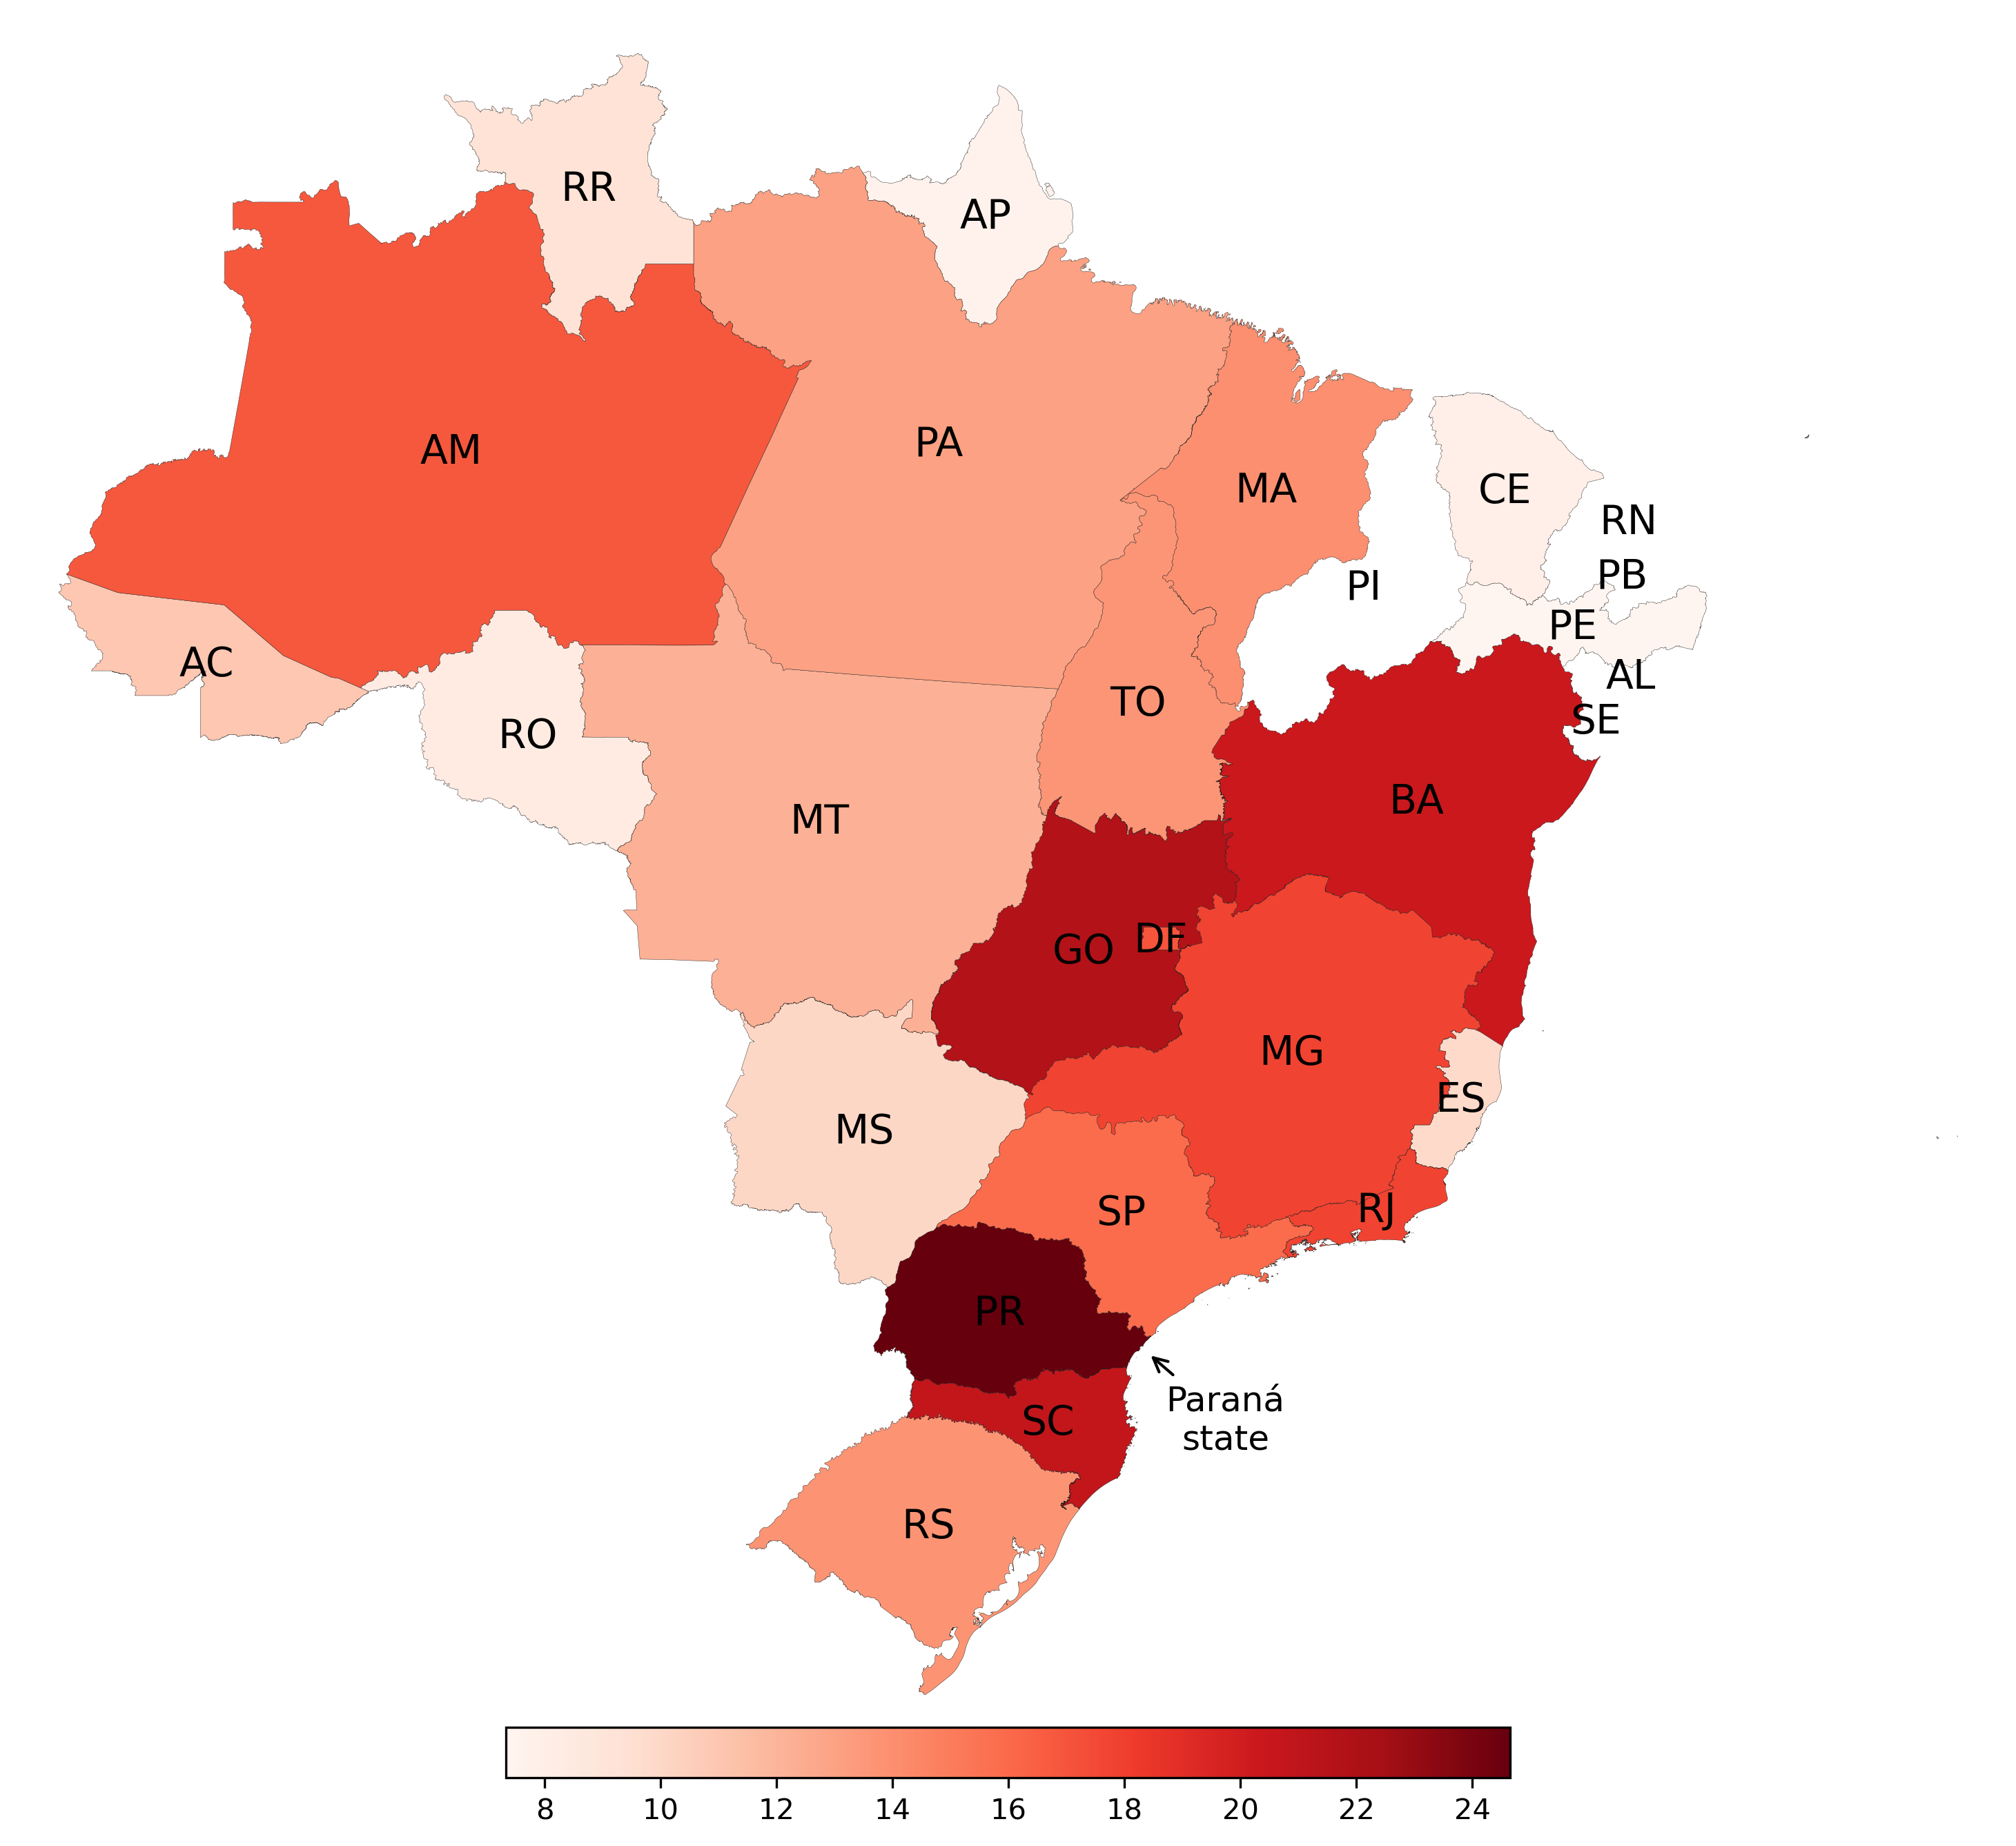

In [120]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300, sharex=True, sharey=False)
states.plot(column='total', cmap='Reds', legend=True, ax=ax,
             linewidth=0.1, edgecolor='0.1',
             legend_kwds={'shrink':0.5, 'pad': 0.0, 'orientation':'horizontal'})
states.apply(lambda x: ax.annotate(text=x['abbrev_state'],
                                       xy=np.subtract(x.geometry.centroid.coords[0], (0, 0.32)),
                                       ha='center', fontsize=14), axis=1)

x, y, arrow_length = 0.57, 0.22, 0.04
ax.annotate('Paraná\nstate', xy=(x, y), xytext=(x+arrow_length, y-arrow_length),
            arrowprops={'facecolor':'black', 'arrowstyle':'->'},
            ha='center', va='center', fontsize=12,
            xycoords=ax.transAxes)

ax.margins(0.02)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

In [ ]:
session.close()
engine.dispose()